In [84]:
import ee
import geemap
from geemap import ml
from sklearn import ensemble
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Inicializa la autenticación y la inicialización de Google Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-facuboladerasgee')

In [23]:
# import os

# def combine_csv_files(folder_path):
#     # Lista para almacenar todos los DataFrames
#     df_list = []
    
#     # Recorrer todos los archivos en la carpeta
#     for filename in os.listdir(folder_path):
#         if filename.endswith(".csv"):
#             file_path = os.path.join(folder_path, filename)
#             # Leer cada archivo CSV y agregarlo a la lista
#             df = pd.read_csv(file_path)
#             df_list.append(df)
    
#     # Combinar todos los DataFrames en uno solo
#     combined_df = pd.concat(df_list, ignore_index=True)
    
#     return combined_df

# # Ejemplo de uso
# folder_path_2019 = 'C://Users//Facu//Downloads//EE_malawi-corregido_2019'
# combined_df_2019 = combine_csv_files(folder_path_2019)


# folder_path_2020 = 'C://Users//Facu//Downloads//EE_malawi-corregido_2019'
# combined_df_2020 = combine_csv_files(folder_path_2020)


# folder_path_2021 = 'C://Users//Facu//Downloads//EE_malawi-corregido_2019'
# combined_df_2021 = combine_csv_files(folder_path_2021)

# combined_df = pd.concat([combined_df_2019, combined_df_2020, combined_df_2021], ignore_index=True)


In [66]:
import os

def combine_csv_files(folder_path):
    # Lista para almacenar todos los DataFrames
    df_list = []
    
    # Recorrer todos los archivos en la carpeta
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            # Leer cada archivo CSV y agregarlo a la lista
            df = pd.read_csv(file_path)
            df_list.append(df)
    
    # Combinar todos los DataFrames en uno solo
    combined_df = pd.concat(df_list, ignore_index=True)
    
    return combined_df

# Ejemplo de uso
folder_path_2019 = 'C://Users//Facu//Downloads//EE_delta'
combined_df = combine_csv_files(folder_path_2019)

In [67]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5521 entries, 0 to 5520
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   system:index           5521 non-null   int64  
 1   EVI                    5521 non-null   float64
 2   HH_dB                  5521 non-null   float64
 3   HH_dB_Contrast         5521 non-null   float64
 4   HH_dB_Correlation      5521 non-null   float64
 5   HH_dB_Entropy          5521 non-null   float64
 6   HH_dB_Inertia          5521 non-null   float64
 7   HH_div_HV              5521 non-null   float64
 8   HH_minus_HV            5521 non-null   float64
 9   HH_plus_HV             5521 non-null   float64
 10  HV_dB                  5521 non-null   float64
 11  HV_dB_Contrast         5521 non-null   float64
 12  HV_dB_Correlation      5521 non-null   float64
 13  HV_dB_Entropy          5521 non-null   float64
 14  HV_dB_Inertia          5521 non-null   float64
 15  MNDW

In [68]:
combined_df['threshold'] = (combined_df['agbd_se'] / combined_df['agbd']) * 100
# combined_df = combined_df.loc[combined_df['Slope'] <= 25]

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5521 entries, 0 to 5520
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   system:index           5521 non-null   int64  
 1   EVI                    5521 non-null   float64
 2   HH_dB                  5521 non-null   float64
 3   HH_dB_Contrast         5521 non-null   float64
 4   HH_dB_Correlation      5521 non-null   float64
 5   HH_dB_Entropy          5521 non-null   float64
 6   HH_dB_Inertia          5521 non-null   float64
 7   HH_div_HV              5521 non-null   float64
 8   HH_minus_HV            5521 non-null   float64
 9   HH_plus_HV             5521 non-null   float64
 10  HV_dB                  5521 non-null   float64
 11  HV_dB_Contrast         5521 non-null   float64
 12  HV_dB_Correlation      5521 non-null   float64
 13  HV_dB_Entropy          5521 non-null   float64
 14  HV_dB_Inertia          5521 non-null   float64
 15  MNDW

In [69]:
# Filtrar los datos cuyo valor en la columna 'threshold' sea menor que 50
df_filtered = combined_df[combined_df['threshold'] < 50]

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 17 to 5237
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   system:index           1296 non-null   int64  
 1   EVI                    1296 non-null   float64
 2   HH_dB                  1296 non-null   float64
 3   HH_dB_Contrast         1296 non-null   float64
 4   HH_dB_Correlation      1296 non-null   float64
 5   HH_dB_Entropy          1296 non-null   float64
 6   HH_dB_Inertia          1296 non-null   float64
 7   HH_div_HV              1296 non-null   float64
 8   HH_minus_HV            1296 non-null   float64
 9   HH_plus_HV             1296 non-null   float64
 10  HV_dB                  1296 non-null   float64
 11  HV_dB_Contrast         1296 non-null   float64
 12  HV_dB_Correlation      1296 non-null   float64
 13  HV_dB_Entropy          1296 non-null   float64
 14  HV_dB_Inertia          1296 non-null   float64
 15  MNDWI   

In [70]:
def remove_outliers(df, column_name):

    # Calcular la media y la desviación estándar de la columna
    mean = df[column_name].mean()
    std_dev = df[column_name].std()
    
    # Calcular el umbral para identificar los outliers
    threshold = 3 * std_dev
    
    # Crear una condición para filtrar los outliers
    condition = (df[column_name] >= (mean - threshold)) & (df[column_name] <= (mean + threshold))
    
    # Crear un nuevo DataFrame con los outliers eliminados
    df_filtered = df[condition]
    
    return df_filtered


df_filtered_remove = remove_outliers(df_filtered, "agbd")

# Mostrar las primeras filas del DataFrame filtrado
df_filtered_remove.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1289 entries, 17 to 5237
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   system:index           1289 non-null   int64  
 1   EVI                    1289 non-null   float64
 2   HH_dB                  1289 non-null   float64
 3   HH_dB_Contrast         1289 non-null   float64
 4   HH_dB_Correlation      1289 non-null   float64
 5   HH_dB_Entropy          1289 non-null   float64
 6   HH_dB_Inertia          1289 non-null   float64
 7   HH_div_HV              1289 non-null   float64
 8   HH_minus_HV            1289 non-null   float64
 9   HH_plus_HV             1289 non-null   float64
 10  HV_dB                  1289 non-null   float64
 11  HV_dB_Contrast         1289 non-null   float64
 12  HV_dB_Correlation      1289 non-null   float64
 13  HV_dB_Entropy          1289 non-null   float64
 14  HV_dB_Inertia          1289 non-null   float64
 15  MNDWI   

In [71]:
df_nuevo = df_filtered_remove[df_filtered_remove['agbd'] <= 550]
# df_nuevo = df_filtered_remove[df_filtered_remove['slope'] <= 30]
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1289 entries, 17 to 5237
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   system:index           1289 non-null   int64  
 1   EVI                    1289 non-null   float64
 2   HH_dB                  1289 non-null   float64
 3   HH_dB_Contrast         1289 non-null   float64
 4   HH_dB_Correlation      1289 non-null   float64
 5   HH_dB_Entropy          1289 non-null   float64
 6   HH_dB_Inertia          1289 non-null   float64
 7   HH_div_HV              1289 non-null   float64
 8   HH_minus_HV            1289 non-null   float64
 9   HH_plus_HV             1289 non-null   float64
 10  HV_dB                  1289 non-null   float64
 11  HV_dB_Contrast         1289 non-null   float64
 12  HV_dB_Correlation      1289 non-null   float64
 13  HV_dB_Entropy          1289 non-null   float64
 14  HV_dB_Inertia          1289 non-null   float64
 15  MNDWI   

In [72]:
def drop_columns(df, columns_to_drop):
    return df.drop(columns=columns_to_drop)

columns_to_drop = ['.geo','system:index']
df_modified = drop_columns(df_nuevo, columns_to_drop)
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1289 entries, 17 to 5237
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EVI                    1289 non-null   float64
 1   HH_dB                  1289 non-null   float64
 2   HH_dB_Contrast         1289 non-null   float64
 3   HH_dB_Correlation      1289 non-null   float64
 4   HH_dB_Entropy          1289 non-null   float64
 5   HH_dB_Inertia          1289 non-null   float64
 6   HH_div_HV              1289 non-null   float64
 7   HH_minus_HV            1289 non-null   float64
 8   HH_plus_HV             1289 non-null   float64
 9   HV_dB                  1289 non-null   float64
 10  HV_dB_Contrast         1289 non-null   float64
 11  HV_dB_Correlation      1289 non-null   float64
 12  HV_dB_Entropy          1289 non-null   float64
 13  HV_dB_Inertia          1289 non-null   float64
 14  MNDWI                  1289 non-null   float64
 15  NDBI    

In [73]:
# Obtener los nombres de las columnas excepto 'agbd' y '.geo'
features = [col for col in df_modified.columns if col not in ['.geo', 'system:index']]

# Mostrar la lista de características
print(features)

['EVI', 'HH_dB', 'HH_dB_Contrast', 'HH_dB_Correlation', 'HH_dB_Entropy', 'HH_dB_Inertia', 'HH_div_HV', 'HH_minus_HV', 'HH_plus_HV', 'HV_dB', 'HV_dB_Contrast', 'HV_dB_Correlation', 'HV_dB_Entropy', 'HV_dB_Inertia', 'MNDWI', 'NDBI', 'NDVI', 'NDVI_Contrast', 'NDVI_Correlation', 'NDVI_Entropy', 'NDVI_Inertia', 'NDVI_Mean_Texture', 'NDVI_Variance_Texture', 'RVI_palsar', 'SAVI', 'SAVI_Contrast', 'SAVI_Correlation', 'SAVI_Entropy', 'SAVI_Inertia', 'SAVI_Mean_Texture', 'SAVI_Variance_Texture', 'SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'agbd', 'agbd_1', 'agbd_se', 'aspect', 'elevation', 'slope', 'threshold']


In [78]:
feature_names =  ['EVI', 'HH_dB', 'HH_dB_Contrast', 'HH_dB_Correlation', 'HH_dB_Entropy', 'HH_dB_Inertia', 'HH_div_HV', 'HH_minus_HV', 'HH_plus_HV', 'HV_dB', 'HV_dB_Contrast', 'HV_dB_Correlation', 'HV_dB_Entropy', 'HV_dB_Inertia', 'MNDWI', 'NDBI', 'NDVI', 'NDVI_Contrast', 'NDVI_Correlation', 'NDVI_Entropy', 'NDVI_Inertia', 'NDVI_Mean_Texture', 'NDVI_Variance_Texture', 'RVI_palsar', 'SAVI', 'SAVI_Contrast', 'SAVI_Correlation', 'SAVI_Entropy', 'SAVI_Inertia', 'SAVI_Mean_Texture', 'SAVI_Variance_Texture', 'SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'agbd', 'agbd_1', 'agbd_se', 'aspect', 'elevation', 'slope', 'threshold']


# # # feature_names_s2_palsar =  ['agbd','B11', 'B12', 'B2', 'B3', 'B4', 'B8', 'CH', 'EVI', 'HH', 'HH_HV_div_2', 'HH_div_HV', 'HH_minus_HV', 'HH_plus_HV', 'HV', 'MNDWI', 'NDBI', 'NDVI', 'RVI_palsar', 'SAVI', 'elevation', 'slope']
feature_names_reduced =  ['agbd','EVI', 'HH_dB', 'HH_dB_Contrast', 'HH_dB_Correlation', 'HH_dB_Entropy', 'HH_dB_Inertia', 'HH_div_HV', 'HH_minus_HV', 'HH_plus_HV', 'HV_dB', 'HV_dB_Contrast', 'HV_dB_Correlation', 'HV_dB_Entropy', 'HV_dB_Inertia', 'MNDWI', 'NDBI', 'NDVI', 'RVI_palsar', 'SAVI', 'SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'aspect', 'elevation', 'slope']

# # df_s2_palsar = df_modified[feature_names_s2_palsar]
df_reduce = df_modified[feature_names_reduced]

In [79]:
# Separar la variable objetivo 'agbd'
y = df_reduce['agbd']

# Separar las variables independientes (todas excepto 'agbd' y '.geo')
X = df_reduce.drop(columns=['agbd'])

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1289 entries, 17 to 5237
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EVI                1289 non-null   float64
 1   HH_dB              1289 non-null   float64
 2   HH_dB_Contrast     1289 non-null   float64
 3   HH_dB_Correlation  1289 non-null   float64
 4   HH_dB_Entropy      1289 non-null   float64
 5   HH_dB_Inertia      1289 non-null   float64
 6   HH_div_HV          1289 non-null   float64
 7   HH_minus_HV        1289 non-null   float64
 8   HH_plus_HV         1289 non-null   float64
 9   HV_dB              1289 non-null   float64
 10  HV_dB_Contrast     1289 non-null   float64
 11  HV_dB_Correlation  1289 non-null   float64
 12  HV_dB_Entropy      1289 non-null   float64
 13  HV_dB_Inertia      1289 non-null   float64
 14  MNDWI              1289 non-null   float64
 15  NDBI               1289 non-null   float64
 16  NDVI               1289 non-

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [81]:
import numpy as np
rf = RandomForestRegressor(random_state=42)

# Definir el grid de parámetros para buscar
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],    
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Entrenar GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Entrenar el modelo con los mejores parámetros
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Hacer predicciones
y_pred = best_rf.predict(X_test)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Root Mean Squared Error: 44.725044199743124
R^2 Score: 0.27923702820669805


In [45]:
import numpy as np
rf = RandomForestRegressor(bootstrap= True, max_depth= 20, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200, random_state=42) 


rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Root Mean Squared Error: 42.714987959372685
R^2 Score: 0.3357187728662696


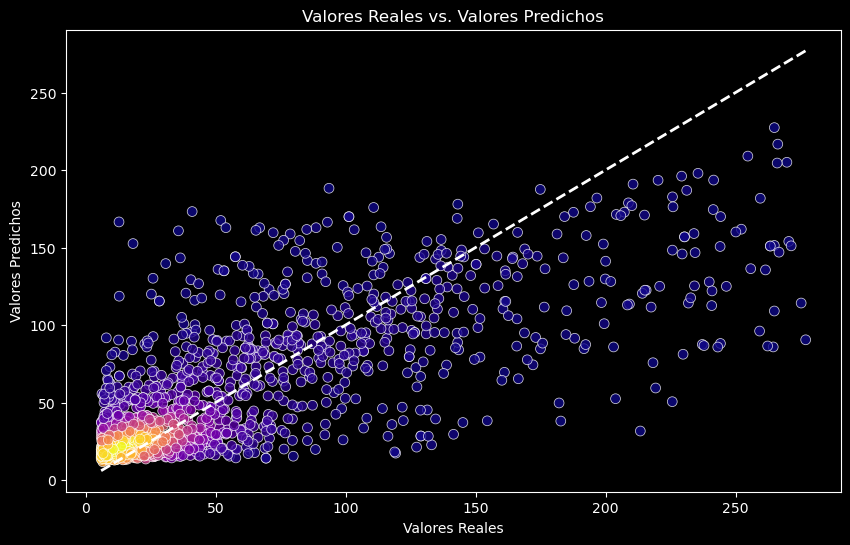

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Calcular la densidad de puntos
xy = np.vstack([y_test, y_pred])
z = gaussian_kde(xy)(xy)

# Crear un gráfico de dispersión con color basado en la densidad de puntos
plt.figure(figsize=(10, 6), facecolor='black')
scatter = plt.scatter(y_test, y_pred, c=z, s=50, cmap='plasma', edgecolor='white', alpha=0.8, linewidth=0.55)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'w--', lw=2)  # Línea de referencia en blanco
plt.xlabel('Valores Reales', color='white')
plt.ylabel('Valores Predichos', color='white')
plt.title('Valores Reales vs. Valores Predichos', color='white')

# Cambiar el color de los ejes y las etiquetas de los ticks
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.gca().xaxis.label.set_color('white')
plt.gca().yaxis.label.set_color('white')
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')

# Cambiar el color del fondo del gráfico
plt.gca().set_facecolor('black')
plt.savefig('real_vs_predicho2.png', facecolor='black')

plt.show()

              Feature  Importance
21              SR_B3    0.455040
26              slope    0.167991
9               HV_dB    0.074595
10     HV_dB_Contrast    0.028743
24             aspect    0.028055
13      HV_dB_Inertia    0.026898
25          elevation    0.026430
7         HH_minus_HV    0.017629
15               NDBI    0.017486
20              SR_B2    0.014339
0                 EVI    0.014268
12      HV_dB_Entropy    0.011070
14              MNDWI    0.010409
3   HH_dB_Correlation    0.010407
8          HH_plus_HV    0.010034
23              SR_B5    0.010011
11  HV_dB_Correlation    0.009837
19              SR_B1    0.009416
4       HH_dB_Entropy    0.008510
1               HH_dB    0.008371
22              SR_B4    0.007688
2      HH_dB_Contrast    0.007679
5       HH_dB_Inertia    0.007438
18               SAVI    0.004673
6           HH_div_HV    0.004634
16               NDVI    0.004315
17         RVI_palsar    0.004035


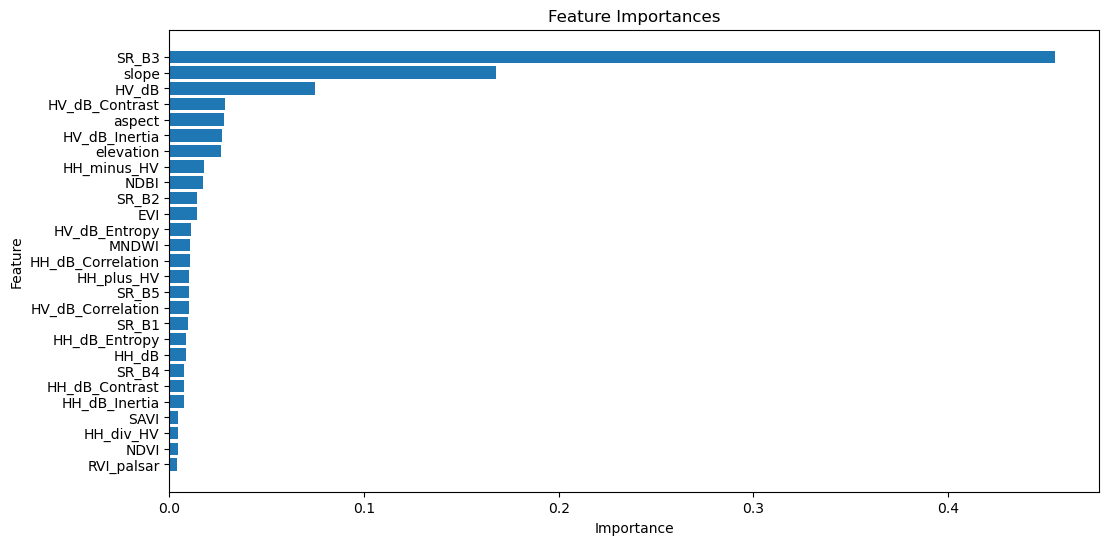

In [20]:
import matplotlib.pyplot as plt
# Obtener la importancia de las características
feature_importances = rf.feature_importances_

# Crear un DataFrame para organizar las importancias de las características
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Mostrar las importancias de las características
print(feature_importances_df)

# Graficar las importancias de las características
plt.figure(figsize=(12, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [82]:
feature_names_reduced =  ['EVI', 'HH_dB', 'HH_dB_Contrast', 'HH_dB_Correlation', 'HH_dB_Entropy', 'HH_dB_Inertia', 'HH_div_HV', 'HH_minus_HV', 'HH_plus_HV', 'HV_dB', 'HV_dB_Contrast', 'HV_dB_Correlation', 'HV_dB_Entropy', 'HV_dB_Inertia', 'MNDWI', 'NDBI', 'NDVI', 'RVI_palsar', 'SAVI', 'SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'aspect', 'elevation', 'slope']


# this function also works with the ensemble.ExtraTrees estimator
trees = ml.rf_to_strings(best_rf, feature_names_reduced,output_mode='regression')

In [20]:
# create a ee classifier to use with ee objects from the trees
ee_classifier = ml.strings_to_classifier(trees)
# ee_classifier.getInfo()

In [85]:
user_id = 'users/facuboladerasgee'
# specify asset id where to save trees
# be sure to change  to your ee user name
asset_id = user_id + "/Rf_delta"
asset_id
# kick off an export process so it will be saved to the ee asset
ml.export_trees_to_fc(trees, asset_id)

In [22]:
def export_model_in_parts(model, feature_names, user_id, base_asset_id, part_size=11):
    trees = ml.rf_to_strings(model, feature_names_reduced, output_mode='regression')
    total_trees = len(trees)
    
    # Dividir los árboles en partes
    for i in range(0, total_trees, part_size):
        part_trees = trees[i:i+part_size]
        part_asset_id = f"{base_asset_id}_part_{i//part_size}"
        
        # Exportar la parte
        ml.export_trees_to_fc(part_trees, part_asset_id)
        print(f"Parte {i//part_size} exportada a {part_asset_id}")

# Ejemplo de uso:
user_id = 'users/facuboladerasgee'
base_asset_id = f"{user_id}/Rf_Malambique"
export_model_in_parts(rf, feature_names_reduced, user_id, base_asset_id)

Parte 0 exportada a users/facuboladerasgee/Rf_Malambique_part_0
Parte 1 exportada a users/facuboladerasgee/Rf_Malambique_part_1
Parte 2 exportada a users/facuboladerasgee/Rf_Malambique_part_2
Parte 3 exportada a users/facuboladerasgee/Rf_Malambique_part_3
Parte 4 exportada a users/facuboladerasgee/Rf_Malambique_part_4
Parte 5 exportada a users/facuboladerasgee/Rf_Malambique_part_5
Parte 6 exportada a users/facuboladerasgee/Rf_Malambique_part_6
Parte 7 exportada a users/facuboladerasgee/Rf_Malambique_part_7
Parte 8 exportada a users/facuboladerasgee/Rf_Malambique_part_8
Parte 9 exportada a users/facuboladerasgee/Rf_Malambique_part_9


In [ ]:
# # Exporta la imagen a Google Cloud Storage
# task = ee.batch.Export.image.toCloudStorage(
#     image=image,
#     description='Sentinel-2_export',
#     bucket='your_bucket_name',  # Reemplaza con el nombre de tu bucket
#     fileNamePrefix='sentinel-2_export',
#     scale=30,
#     region=region,
#     maxPixels=1e13  # Ajusta el límite de píxeles si es necesario
# )

# # Inicia la tarea de exportación
# task.start()

# print('Export task started. Check the GCS bucket for the exported files.')